In [2]:
import pandas as pd
df_loaded = pd.read_csv('../dataset/clean/clean_sak_occupation_full.csv', 
                        sep=',', 
                        quotechar='"', 
                        encoding='utf-8',dtype=str)
df_loaded.head()

,text_description,kbli_code,kbji_code
0,aktivitas: kepala desa. produk: jasa pemerinta...,84119,1113
1,aktivitas: mencangkul dan menanam padi. produk...,01122,6111
2,aktivitas: melayani administrasi di kantor kec...,84119,1213
3,aktivitas: administrasi smp 1 negeri teupah se...,85491,4131
4,aktivitas: jualan bahan makanan. produk: semba...,47112,5211


In [3]:
df_kbli=df_loaded[["text_description","kbli_code"]]

df_kbli.head()

,text_description,kbli_code
0,aktivitas: kepala desa. produk: jasa pemerinta...,84119
1,aktivitas: mencangkul dan menanam padi. produk...,01122
2,aktivitas: melayani administrasi di kantor kec...,84119
3,aktivitas: administrasi smp 1 negeri teupah se...,85491
4,aktivitas: jualan bahan makanan. produk: semba...,47112


In [4]:
db_kbli=pd.read_csv("../dataset/kbli2020.csv")
db_kbli_5=db_kbli[db_kbli["digit"]==5]
db_kbli_5.head()

len(db_kbli_5)

1791

In [5]:
unique_code,n_sample=df_kbli["kbli_code"].nunique(), len(df_kbli)

(unique_code,n_sample)


(1756, 2085667)

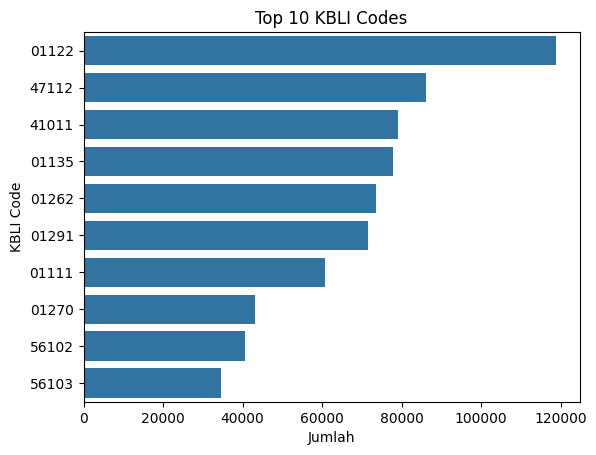

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

top_classes = df_kbli["kbli_code"].value_counts().head(10)
sns.barplot(y=top_classes.index, x=top_classes.values)
plt.title("Top 10 KBLI Codes")
plt.xlabel("Jumlah")
plt.ylabel("KBLI Code")
plt.show()


In [7]:
counts = df_kbli["kbli_code"].value_counts()
rare_classes = counts[counts < 10]  # misalnya threshold di bawah 10
len(rare_classes), rare_classes.sum() / len(df_kbli) * 100


(232, np.float64(0.053987525333622284))

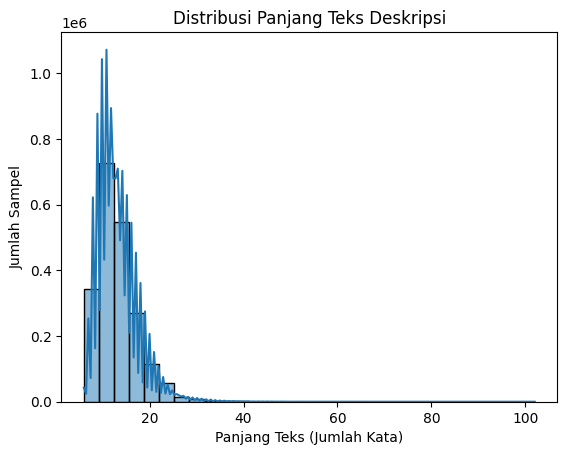

In [8]:
df_kbli["text_length"] = df_kbli["text_description"].str.split().apply(len)
sns.histplot(df_kbli["text_length"], bins=30, kde=True)
plt.title("Distribusi Panjang Teks Deskripsi")
plt.xlabel("Panjang Teks (Jumlah Kata)")
plt.ylabel("Jumlah Sampel")
plt.show()


In [9]:
## print info
print("Jumlah sampel teks: ", n_sample)
print("Jumlah label unik KBLI dalam database: 1791")
print("Jumlah label unik KBLI dalam dataset : ",unique_code)
print("jumlah rare class (<10): ",len(rare_classes))
print("persentase rare class: ",len(rare_classes)/len(df_kbli),"%")
## print top 10
# ... existing code ...
print("top 10 class and count: ", ', '.join([f"{idx}: {val}" for idx, val in top_classes.items()]))
# ... existing code ...
#print("top 10 class persentase: ",top_classes/len(df_kbli),"%")

Jumlah sampel teks:  2085667
Jumlah label unik KBLI dalam database: 1791
Jumlah label unik KBLI dalam dataset :  1756
jumlah rare class (<10):  232
persentase rare class:  0.00011123539855595357 %
top 10 class and count:  01122: 118801, 47112: 86143, 41011: 79103, 01135: 77874, 01262: 73678, 01291: 71524, 01111: 60838, 01270: 43185, 56102: 40597, 56103: 34530


In [10]:
# Identifikasi kelas dengan minimal 2 sampel
valid_classes = df_kbli["kbli_code"].value_counts()
valid_classes = valid_classes[valid_classes >= 2].index

# Filter dataset hanya untuk kelas valid tersebut
df_kbli_filtered = df_kbli[df_kbli["kbli_code"].isin(valid_classes)]

# Ambil subset 10% stratified
from sklearn.model_selection import train_test_split

df_subset, _ = train_test_split(
    df_kbli_filtered,
    test_size=0.9,
    stratify=df_kbli_filtered['kbli_code'],
    random_state=42
)


In [11]:
df_subset.head()

,text_description,kbli_code,text_length
1711304,aktivitas: membantu menjemur cengke. produk: c...,01282,11
784869,aktivitas: tenaga honorer guru bahasa indonesi...,85230,21
440427,aktivitas: membersihkan rumput di kebun kopi. ...,01270,12
1620793,aktivitas: jual kueh putu mayang keliling. pro...,47991,13
794608,"aktivitas: dosen unwina (dosen tidak tetap, ma...",85321,13


In [12]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208564 entries, 1711304 to 1853992
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   text_description  208564 non-null  object
 1   kbli_code         208564 non-null  object
 2   text_length       208564 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.4+ MB


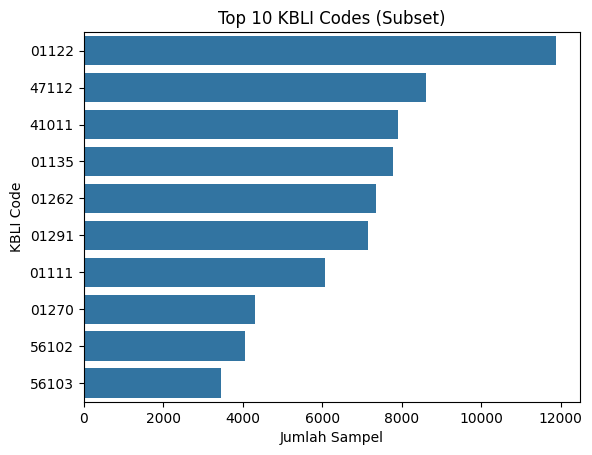

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

top_classes_subset = df_subset["kbli_code"].value_counts().head(10)
sns.barplot(y=top_classes_subset.index, x=top_classes_subset.values)
plt.title("Top 10 KBLI Codes (Subset)")
plt.xlabel("Jumlah Sampel")
plt.ylabel("KBLI Code")
plt.show()


In [15]:
import csv
df_subset.to_csv("../dataset/clean/subset_kbli_classify.csv",index=False, sep=',', quotechar='"', quoting=csv.QUOTE_ALL, encoding='utf-8')